In [190]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report, cohen_kappa_score,ConfusionMatrixDisplay

import numpy as np
data_without_outliers = pd.read_csv('../Preprocesamiento/sin_outliers.csv')
new_df = data_without_outliers.groupby('RainTomorrow').apply(lambda x: x.sample(n=data_without_outliers['RainTomorrow'].value_counts()['Yes'])).reset_index(drop = True)
numComponents_initial = new_df.select_dtypes('float64').shape[1]
num_data = new_df.select_dtypes('float64')

data_transformed_ = (num_data-num_data.min())/(num_data.max()-num_data.min())
for numComponents in range(numComponents_initial):
    pca = PCA(n_components=numComponents)
    pca.fit(data_transformed_.to_numpy())
    if pca.explained_variance_ratio_.sum()>=0.998:
        break 

In [191]:
print(f'numero de componentes encontrado para mantener una proporcion de varianza del 90%: {numComponents}')
print(f'Explained variance ratio con {numComponents} componentes: {pca.explained_variance_ratio_.sum()}')
projected = pca.transform(data_transformed_.to_numpy())
projected = pd.DataFrame(projected)
projected['Lluvia'] = new_df['RainTomorrow'].values
projected

numero de componentes encontrado para mantener una proporcion de varianza del 90%: 14
Explained variance ratio con 14 componentes: 0.9983323931646766


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Lluvia
0,-0.112346,-0.214154,0.006181,-0.060686,-0.163174,-0.245810,0.046074,0.022448,-0.039038,-0.071349,-0.043893,-0.002548,-0.004200,0.005462,No
1,0.445209,-0.754403,-0.183491,-0.010831,0.067358,0.087626,-0.012747,-0.012924,0.019948,0.033191,0.033457,0.002974,0.010152,-0.012540,No
2,-0.675306,0.237799,-0.024502,0.007624,0.031427,0.085043,-0.093637,0.033654,0.018756,-0.083294,0.014581,-0.002429,-0.021830,-0.008639,No
3,0.725636,-0.429221,-0.055163,-0.060657,-0.075096,0.130005,-0.069530,0.040136,-0.009367,0.071204,0.041094,-0.021103,0.016045,-0.034876,No
4,1.072456,0.317599,-0.177429,-0.051071,0.005590,0.062828,0.130397,-0.051102,0.064986,-0.009205,0.014778,0.033797,0.024038,-0.048948,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33637,0.168354,-0.139815,0.109475,-0.236104,0.169348,-0.113169,0.062051,-0.013332,0.074869,-0.036432,-0.029239,-0.037140,0.024298,-0.034172,Yes
33638,-0.598097,0.254708,0.002456,0.185031,0.234650,0.059774,0.000282,0.073957,0.025787,0.065382,-0.073832,-0.024877,-0.001031,-0.038458,Yes
33639,0.268828,-0.173862,0.066577,-0.173608,0.273169,-0.060658,0.125515,0.031762,-0.084980,-0.085014,0.045163,-0.018899,-0.002280,-0.018607,Yes
33640,-0.796454,-0.110691,-0.022036,-0.078077,-0.012368,0.097647,0.197226,-0.135803,-0.028241,0.209594,0.080796,-0.001352,-0.008455,-0.042769,Yes


In [192]:
pca.explained_variance_ratio_

array([0.46335937, 0.19108988, 0.08031866, 0.06758207, 0.06310022,
       0.04229072, 0.03365662, 0.02291554, 0.01436663, 0.00804017,
       0.00549536, 0.00290451, 0.00175549, 0.00145716])

In [193]:
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(projected.select_dtypes('float64'),projected['Lluvia'], test_size=0.33, random_state=42)
clf = RandomForestClassifier()#tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [194]:
cm = confusion_matrix(y_test,y_pred,normalize='all')
cr = classification_report(y_test,y_pred)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(y_test,y_pred)*100))  
print(cr)

k= cohen_kappa_score(y_test,y_pred)
print('kappa : %0.3f'%k)

Confusion Matrix: 

[[0.40389119 0.09791029]
 [0.10286435 0.39533417]]

overall Accuracy: 79.92 %
              precision    recall  f1-score   support

          No       0.80      0.80      0.80      5571
         Yes       0.80      0.79      0.80      5531

    accuracy                           0.80     11102
   macro avg       0.80      0.80      0.80     11102
weighted avg       0.80      0.80      0.80     11102

kappa : 0.598


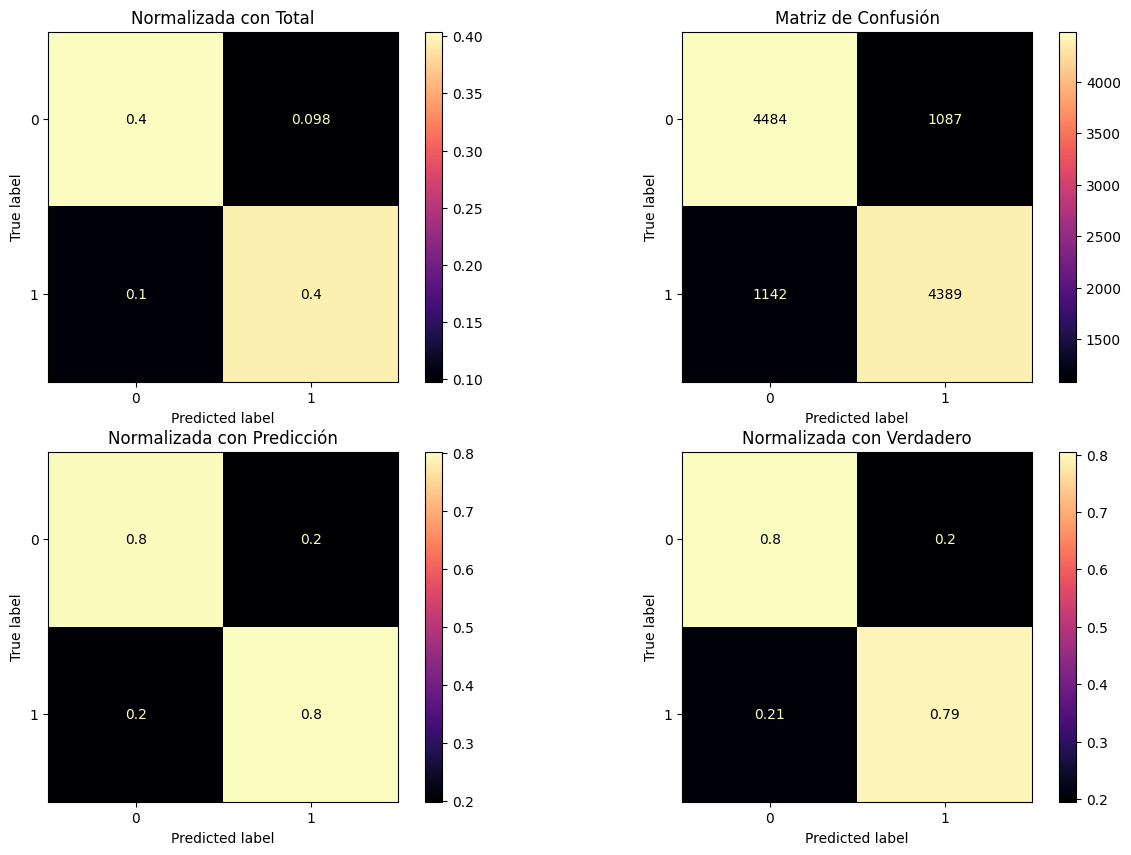

In [195]:
# confusion matrix recall and precision
# with pred we can obtain precision and from true we can obtain recall
fig, ax = plt.subplots(2, 2, figsize=(15,10))
ax[0][0].set_title("Normalizada con Total")
ax[1][0].set_title("Normalizada con Predicción")
ax[1][1].set_title("Normalizada con Verdadero")
ax[0][1].set_title("Matriz de Confusión")

CM = [('all','Confusion Matrix Normalized',ax[0][0]),(None,'Confusion Matrix',ax[0][1]),('pred','Predicted Normalized',ax[1][0]),('true','True Normalized',ax[1][1])]

for matrix in CM:
    
    norm, name,subplot_ = matrix
    cm = confusion_matrix( y_test,y_pred,normalize=norm)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=['0','1'])
    disp.plot(cmap='magma',ax=subplot_)
    # subplot_.title('{}'.format(name))
    # plt.savefig('./images_show/ANN_{}_augmented.png'.format(name))

In [169]:
X_train, X_test, y_train, y_test = train_test_split(projected.select_dtypes('float64'),projected['Lluvia'], test_size=0.33, random_state=42)
clf =tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [170]:
cm = confusion_matrix(y_test,y_pred,normalize='all')
cr = classification_report(y_test,y_pred)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(y_test,y_pred)*100))  
print(cr)

k= cohen_kappa_score(y_test,y_pred)
print('kappa : %0.3f'%k)

Confusion Matrix: 

[[0.35498108 0.14682039]
 [0.1406053  0.35759323]]

overall Accuracy: 71.26 %
              precision    recall  f1-score   support

          No       0.72      0.71      0.71      5571
         Yes       0.71      0.72      0.71      5531

    accuracy                           0.71     11102
   macro avg       0.71      0.71      0.71     11102
weighted avg       0.71      0.71      0.71     11102

kappa : 0.425


Con ciudades cercanas

In [196]:
data_without_outliers = pd.read_csv('../Preprocesamiento/sin_outliers.csv')
filtered = data_without_outliers[data_without_outliers['Location'].isin(['Melbourne','Canberra','Sydney','SydneyAirport','NorfolkIsland','WaggaWagga'])]
new_df = filtered.groupby('RainTomorrow').apply(lambda x: x.sample(n=filtered['RainTomorrow'].value_counts()['Yes'])).reset_index(drop = True)
numComponents_initial = new_df.select_dtypes('float64').shape[1]
num_data = new_df.select_dtypes('float64')

data_transformed_ = (num_data-num_data.min())/(num_data.max()-num_data.min())
for numComponents in range(numComponents_initial):
    pca = PCA(n_components=numComponents)
    pca.fit(data_transformed_.to_numpy())
    if pca.explained_variance_ratio_.sum()>=0.998:
        break 

In [197]:
print(f'numero de componentes encontrado para mantener una proporcion de varianza del 90%: {numComponents}')
print(f'Explained variance ratio con {numComponents} componentes: {pca.explained_variance_ratio_.sum()}')
projected = pca.transform(data_transformed_.to_numpy())
projected = pd.DataFrame(projected)
projected['Lluvia'] = new_df['RainTomorrow'].values
projected

numero de componentes encontrado para mantener una proporcion de varianza del 90%: 14
Explained variance ratio con 14 componentes: 0.998458834842942


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,Lluvia
0,0.096519,0.696069,0.316135,-0.228249,0.318553,-0.274049,0.090839,-0.075773,-0.102837,0.037520,0.021055,0.008268,0.112973,-0.000069,No
1,0.269902,0.014269,-0.162834,-0.116447,0.132037,-0.061101,-0.187583,-0.148359,-0.052809,-0.058154,0.019829,0.020462,-0.033290,0.051124,No
2,-0.600603,-0.629421,-0.004703,-0.105544,0.151805,0.132099,0.085208,-0.024240,0.073243,0.046909,-0.070070,-0.019185,0.033994,-0.043090,No
3,0.755847,-0.021863,-0.160189,-0.225767,0.061897,-0.086613,0.053456,0.116183,-0.199467,0.033402,-0.046891,-0.008433,0.011777,-0.011897,No
4,0.516049,-0.434846,-0.033346,0.239707,0.217751,-0.119585,-0.106413,-0.217801,0.102703,0.001629,0.077307,0.066619,-0.038991,-0.033926,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7547,-0.334809,0.398103,-0.074174,-0.173030,0.066219,0.130985,-0.000133,-0.188102,0.049903,0.096961,0.135819,-0.029878,0.001057,-0.017174,Yes
7548,-0.141114,0.277167,0.010061,0.061859,0.074240,-0.057888,-0.122950,-0.048677,0.256531,-0.024806,0.032845,0.006935,-0.004035,-0.001187,Yes
7549,-0.323946,0.194177,-0.184412,0.024026,-0.100129,0.025715,-0.215464,-0.045516,0.053905,-0.107317,0.015969,0.075096,0.019887,-0.009128,Yes
7550,-0.440939,0.374667,0.017328,-0.013490,-0.013214,-0.196124,0.190045,-0.023572,0.098385,-0.015845,-0.055478,-0.011505,0.051378,0.021441,Yes


In [177]:
X_train, X_test, y_train, y_test = train_test_split(projected.select_dtypes('float64'),projected['Lluvia'], test_size=0.33, random_state=42)
clf = RandomForestClassifier()#tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [174]:
#usando el pca de todos los datos
cm = confusion_matrix(y_test,y_pred,normalize='all')
cr = classification_report(y_test,y_pred)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(y_test,y_pred)*100))  
print(cr)

k= cohen_kappa_score(y_test,y_pred)
print('kappa : %0.3f'%k)

Confusion Matrix: 

[[0.39831528 0.10589651]
 [0.12675491 0.36903329]]

overall Accuracy: 76.73 %
              precision    recall  f1-score   support

          No       0.76      0.79      0.77      1257
         Yes       0.78      0.74      0.76      1236

    accuracy                           0.77      2493
   macro avg       0.77      0.77      0.77      2493
weighted avg       0.77      0.77      0.77      2493

kappa : 0.535


In [178]:
#con pca solo para la region
cm = confusion_matrix(y_test,y_pred,normalize='all')
cr = classification_report(y_test,y_pred)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(y_test,y_pred)*100))  
print(cr)

k= cohen_kappa_score(y_test,y_pred)
print('kappa : %0.3f'%k)

Confusion Matrix: 

[[0.39029282 0.11391897]
 [0.11632571 0.37946249]]

overall Accuracy: 76.98 %
              precision    recall  f1-score   support

          No       0.77      0.77      0.77      1257
         Yes       0.77      0.77      0.77      1236

    accuracy                           0.77      2493
   macro avg       0.77      0.77      0.77      2493
weighted avg       0.77      0.77      0.77      2493

kappa : 0.539


In [198]:
X_train, X_test, y_train, y_test = train_test_split(projected.select_dtypes('float64'),projected['Lluvia'], test_size=0.33, random_state=42)
clf =tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [199]:
#con pca solo para la region con decision tree
cm = confusion_matrix(y_test,y_pred,normalize='all')
cr = classification_report(y_test,y_pred)
print('Confusion Matrix: \n')
print(cm)

print('\noverall Accuracy: {:0.2f} %'.format(accuracy_score(y_test,y_pred)*100))  
print(cr)

k= cohen_kappa_score(y_test,y_pred)
print('kappa : %0.3f'%k)

Confusion Matrix: 

[[0.3449659  0.15924589]
 [0.14961893 0.34616927]]

overall Accuracy: 69.11 %
              precision    recall  f1-score   support

          No       0.70      0.68      0.69      1257
         Yes       0.68      0.70      0.69      1236

    accuracy                           0.69      2493
   macro avg       0.69      0.69      0.69      2493
weighted avg       0.69      0.69      0.69      2493

kappa : 0.382
